# Capstone Section 0: Ong Song Yi

# Capstone Section 1: Problem Statement

## Introduction

The COVID-19 virus caused the largest global economic recession in history, worst than 'The Great Depression'
<br>
<br>

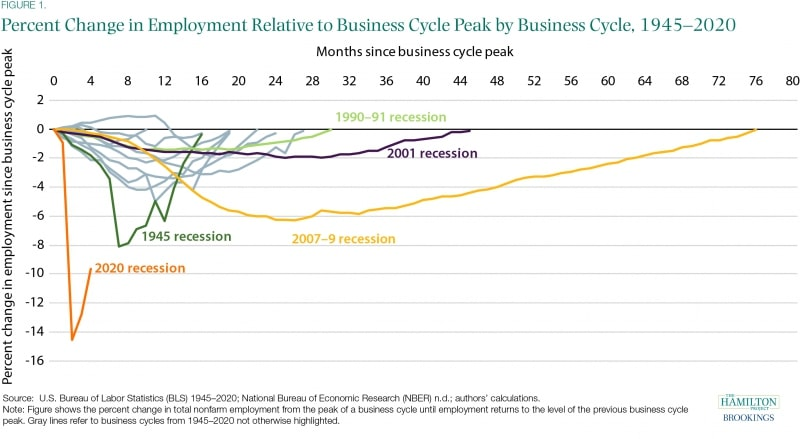

<br>
<br>
The United Nations (UN) predicted that by April 2020, 195 million full-time workers were unemployed. Tourism, Retail and Food and Beverage (F&B) sectors among others were the most impacted.
<br>
<br>

[Source](https://en.wikipedia.org/wiki/COVID-19_recession)

## Problem Statement

In trying to avert the next economic recession, the World Health Organization (WHO) and its surveillance team is constantly on the lookout for the next zoonotic disease and has tasked its Data Analytics team to analyse the future impact of Monkeypox.

# Capstone Section 2: Preprocessing

## Importing Libraries

In [108]:
#!pip install streamlit
#!pip install epyestim
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import epyestim.covid19 as covid19
from plotly.subplots import make_subplots

## Reading Data Files

In [109]:
daily_cases = pd.read_csv('https://raw.githubusercontent.com/owid/monkeypox/main/owid-monkeypox-data.csv')
daily_cases.head()

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Andorra,AND,2022-07-25,2.0,0.0,2.0,0.0,0.29,0.0,25.306,25.306,3.669,0.0,0.0,0.0
1,Andorra,AND,2022-07-26,3.0,0.0,1.0,0.0,0.43,0.0,12.653,37.958,5.441,0.0,0.0,0.0
2,Andorra,AND,2022-07-27,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.958,5.441,0.0,0.0,0.0
3,Andorra,AND,2022-07-28,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.958,5.441,0.0,0.0,0.0
4,Andorra,AND,2022-07-29,3.0,0.0,0.0,0.0,0.43,0.0,0.000,37.958,5.441,0.0,0.0,0.0


In [110]:
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         8694 non-null   object 
 1   iso_code                         8694 non-null   object 
 2   date                             8694 non-null   object 
 3   total_cases                      8694 non-null   float64
 4   total_deaths                     8694 non-null   float64
 5   new_cases                        8694 non-null   float64
 6   new_deaths                       8694 non-null   float64
 7   new_cases_smoothed               8694 non-null   float64
 8   new_deaths_smoothed              8694 non-null   float64
 9   new_cases_per_million            8694 non-null   float64
 10  total_cases_per_million          8694 non-null   float64
 11  new_cases_smoothed_per_million   8694 non-null   float64
 12  new_deaths_per_milli

In [111]:
daily_cases['date'] = pd.to_datetime(daily_cases['date'])
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         8694 non-null   object        
 1   iso_code                         8694 non-null   object        
 2   date                             8694 non-null   datetime64[ns]
 3   total_cases                      8694 non-null   float64       
 4   total_deaths                     8694 non-null   float64       
 5   new_cases                        8694 non-null   float64       
 6   new_deaths                       8694 non-null   float64       
 7   new_cases_smoothed               8694 non-null   float64       
 8   new_deaths_smoothed              8694 non-null   float64       
 9   new_cases_per_million            8694 non-null   float64       
 10  total_cases_per_million          8694 non-null   float64    

In [112]:
daily_total_cases = daily_cases[['date',\
                                 'location', \
                                 'iso_code', \
                                 'total_cases', \
                                 'total_deaths', \
                                 'new_cases', \
                                 'new_deaths']]
daily_total_cases = daily_total_cases.rename(mapper={'date': 'Date',\
                                                     'location': 'Location',\
                                                     'iso_code': 'ISO', \
                                                    'total_cases': 'Total Cases',\
                                                    'total_deaths': 'Total Deaths',\
                                                    'new_cases': 'New Cases',\
                                                    'new_deaths': 'New Deaths'},
                                            axis=1)
daily_total_cases

,Date,Location,ISO,Total Cases,Total Deaths,New Cases,New Deaths
0,2022-07-25,Andorra,AND,2.0,0.0,2.0,0.0
1,2022-07-26,Andorra,AND,3.0,0.0,1.0,0.0
2,2022-07-27,Andorra,AND,3.0,0.0,0.0,0.0
3,2022-07-28,Andorra,AND,3.0,0.0,0.0,0.0
4,2022-07-29,Andorra,AND,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8689,2022-09-24,World,OWID_WRL,65354.0,26.0,442.0,0.0
8690,2022-09-25,World,OWID_WRL,65472.0,26.0,118.0,0.0
8691,2022-09-26,World,OWID_WRL,65600.0,26.0,128.0,0.0
8692,2022-09-27,World,OWID_WRL,66472.0,26.0,872.0,0.0


# Capstone Section 3:Exploratory Data Analysis(EDA)

In [113]:
total = daily_total_cases.groupby('Location').max().sort_values(by='Total Cases', ascending=False)
total

,Date,ISO,Total Cases,Total Deaths,New Cases,New Deaths
Location,,,,,,
World,2022-09-28,OWID_WRL,67556.0,27.0,1814.0,5.0
United States,2022-09-28,USA,25169.0,1.0,1392.0,1.0
Brazil,2022-09-28,BRA,7534.0,2.0,410.0,1.0
Spain,2022-09-28,ESP,7149.0,3.0,560.0,2.0
France,2022-09-28,FRA,3970.0,0.0,541.0,0.0
...,...,...,...,...,...,...
Guadeloupe,2022-08-05,GLP,1.0,0.0,1.0,0.0
Barbados,2022-07-19,BRB,1.0,0.0,1.0,0.0
Jordan,2022-09-08,JOR,1.0,0.0,1.0,0.0


In [114]:
#Setting figure for chart


#Plotting the chart
fig = px.bar(data_frame=total.iloc[1:11], x=total.iloc[1:11].index, y=total.iloc[1:11]['Total Cases'],\
      color='Total Cases', text_auto=True)

#Updating font size
fig.update_traces(textfont_size=13, textposition='outside', cliponaxis=False)

#Setting title, x axis, y axis title
fig.update_layout(title_text='Top 10 Countries', title_x=0.5, title_y=0.95)
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Number of Cases')

The top 10 countries that account for monkeypox all fall within the Americas and Europe

In [115]:
global_daily_cases = daily_total_cases[daily_total_cases['Location'] == 'World']
global_daily_cases

,Date,Location,ISO,Total Cases,Total Deaths,New Cases,New Deaths
8543,2022-05-01,World,OWID_WRL,17.0,0.0,0.0,0.0
8544,2022-05-02,World,OWID_WRL,17.0,0.0,0.0,0.0
8545,2022-05-03,World,OWID_WRL,17.0,0.0,0.0,0.0
8546,2022-05-04,World,OWID_WRL,17.0,0.0,0.0,0.0
8547,2022-05-05,World,OWID_WRL,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8689,2022-09-24,World,OWID_WRL,65354.0,26.0,442.0,0.0
8690,2022-09-25,World,OWID_WRL,65472.0,26.0,118.0,0.0
8691,2022-09-26,World,OWID_WRL,65600.0,26.0,128.0,0.0
8692,2022-09-27,World,OWID_WRL,66472.0,26.0,872.0,0.0


In [116]:
global_daily_cases['Date_f'] = pd.factorize(global_daily_cases['Date'])[0] + 1
global_daily_cases
mapping = dict(zip(global_daily_cases['Date_f'], global_daily_cases['Date']))

C:\Users\lydra\AppData\Local\Temp\ipykernel_16932\2644370488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
reproduction_no = global_daily_cases.set_index('Date')
reproduction_no = reproduction_no.drop(labels=['Location', \
                                               'ISO', \
                                               'Total Cases', \
                                               'Total Deaths', \
                                               'New Deaths', \
                                               'Date_f'],\
                                      axis=1)

reproduction_no = reproduction_no.squeeze()
reproduction_no = covid19.r_covid(reproduction_no)
reproduction_no['R Average'] = reproduction_no['R_mean'].mean()
reproduction_no

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975,R Average
2022-05-16,5.0,2.253218,0.048340,1.846178,2.246117,2.712745,1.126397
2022-05-17,3.0,1.952586,0.032532,1.611798,1.947136,2.321696,1.126397
2022-05-18,5.0,1.726457,0.023237,1.434500,1.721952,2.034117,1.126397
2022-05-19,18.0,1.568785,0.017920,1.320407,1.565112,1.844422,1.126397
2022-05-20,45.0,1.490312,0.014737,1.262258,1.487209,1.737752,1.126397
...,...,...,...,...,...,...,...
2022-09-14,858.0,0.973048,0.000578,0.926753,0.972852,1.020787,1.126397
2022-09-15,1206.0,0.977493,0.000586,0.930461,0.977293,1.025500,1.126397
2022-09-16,607.0,0.979269,0.000593,0.931972,0.979066,1.027780,1.126397
2022-09-17,694.0,0.981366,0.000597,0.933899,0.981161,1.030070,1.126397


In [118]:
# Setting Subplots
fig = make_subplots(rows=1, cols=2, \
                    subplot_titles=['Total Number of Cases', 'R0 over Time'])

# Charting first chart
fig.add_trace(
    go.Scatter(x=global_daily_cases['Date'], y=global_daily_cases['Total Cases'], name='Total'),
    row=1, col=1
)

# Charting second chart
fig.add_trace(
    go.Scatter(x=reproduction_no.index, y=reproduction_no['R_mean'], name='R0'),
    row=1, col=2
)

# Charting R Average on second chart
fig.add_trace(
    go.Scatter(x=reproduction_no.index, y=reproduction_no['R Average'], name='Average R0'),
    row=1, col=2
)

In [119]:
df = px.data.gapminder().query('year==2007')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [120]:
px.choropleth(df, locations='iso_alpha',color='lifeExp', hover_name='country',\
             color_continuous_scale=px.colors.sequential.Plasma)

In [121]:
daily_total_cases= daily_total_cases[daily_total_cases['Location'] != 'World']
daily_total_cases

,Date,Location,ISO,Total Cases,Total Deaths,New Cases,New Deaths
0,2022-07-25,Andorra,AND,2.0,0.0,2.0,0.0
1,2022-07-26,Andorra,AND,3.0,0.0,1.0,0.0
2,2022-07-27,Andorra,AND,3.0,0.0,0.0,0.0
3,2022-07-28,Andorra,AND,3.0,0.0,0.0,0.0
4,2022-07-29,Andorra,AND,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8538,2022-09-14,Venezuela,VEN,3.0,0.0,0.0,0.0
8539,2022-09-15,Venezuela,VEN,3.0,0.0,0.0,0.0
8540,2022-09-16,Venezuela,VEN,3.0,0.0,0.0,0.0
8541,2022-09-17,Venezuela,VEN,3.0,0.0,0.0,0.0


In [122]:
global_daily_cases

,Date,Location,ISO,Total Cases,Total Deaths,New Cases,New Deaths,Date_f
8543,2022-05-01,World,OWID_WRL,17.0,0.0,0.0,0.0,1
8544,2022-05-02,World,OWID_WRL,17.0,0.0,0.0,0.0,2
8545,2022-05-03,World,OWID_WRL,17.0,0.0,0.0,0.0,3
8546,2022-05-04,World,OWID_WRL,17.0,0.0,0.0,0.0,4
8547,2022-05-05,World,OWID_WRL,17.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
8689,2022-09-24,World,OWID_WRL,65354.0,26.0,442.0,0.0,147
8690,2022-09-25,World,OWID_WRL,65472.0,26.0,118.0,0.0,148
8691,2022-09-26,World,OWID_WRL,65600.0,26.0,128.0,0.0,149
8692,2022-09-27,World,OWID_WRL,66472.0,26.0,872.0,0.0,150
